In [1]:
import numpy as np
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta,uniform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#plt.style.use("ggplot")
np.random.seed(123)

100


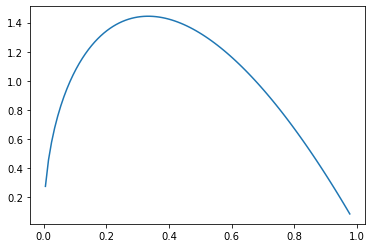

In [3]:
a,b = 1.5, 2.0
#linspaceによるx軸の設定　設定としてはベータ分布の0.001~0.999までを100区切りで用意
x = np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)
plt.plot(x,beta.pdf(x,a,b))
print(len(x))

In [4]:
f = beta(a=a,b=b).pdf

#最小値を求める問題へ変換するために-f(x)とし適当な初期値として0.3
res = opt.fmin(lambda x: -f(x),0.3)

#上の処理により求めた棄却ラインをy_maxへ代入
y_max=f(res)
print(y_max)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20
[1.44337567]


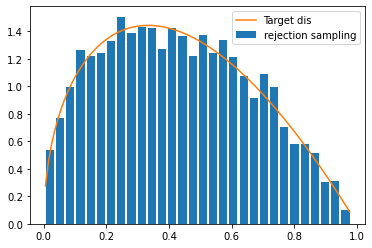

In [5]:
#乱数を生成
NMCS = 5000
#今回は一様分布を提案分布に
x_mcs = uniform.rvs(size=NMCS)

#Mg(x)　乱数rを引く
r = uniform.rvs(size=NMCS)*y_max

#r<=f(x)　乱数が目的分布以下のものをacceptとして受け取る
#この時NMCSによりsizeが指定されているのでその中から真のものだけを受け取りそれ以外は棄却
accept = x_mcs[r<=f(x_mcs)]

#受容したものをヒストグラムとして出力
#棄却サンプリングは英語でejection sampling
plt.hist(accept, density = True, bins = 30, rwidth = 0.8, label = "rejection sampling")

x = np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)
plt.plot(x,beta.pdf(x,a,b),label="Target dis")
plt.legend()